In [1]:
#loading libraries
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit
from scipy.stats import shapiro
#!pip install fitter
#from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import norm
from scipy.optimize import minimize
%matplotlib inline
from scipy.stats import lognorm 

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Reading in data 

4 qubits

In [2]:
with open("Exact_Sol_MINI_4Q_UCC_POWELL.txt","r") as f: 
    Ref_Energy_4Q = f.read()
    
print(Ref_Energy_4Q)

-1.0521545049632688


In [3]:
with open("MINI_4Q_UCC_POWELL.txt","r") as f:
    MINI_4Q = f.read().splitlines()
#    vqe_6G.remove("Vqe Result")
    MINI_4Q = list(map(float,MINI_4Q))
print(len(MINI_4Q))

100


2 qubits

In [4]:
with open("Exact_Sol_MINI_2Q_UCC_POWELL.txt","r") as f:
    Ref_Energy_2Q = f.read()
    
print(Ref_Energy_2Q)

-1.0521545049632666


In [5]:
with open("MINI_2Q_UCC_POWELL.txt","r") as f:
    MINI_2Q = f.read().splitlines()
#    vqe_6G.remove("Vqe Result")
    MINI_2Q = list(map(float,MINI_2Q))
print(len(MINI_2Q))

100


1 qubit

In [6]:
with open("Exact_Sol_MINI_1Q_UCC_POWELL.txt","r") as f:
    Ref_Energy_1Q = f.read()
    
print(Ref_Energy_1Q)

-1.0521545049632683


In [7]:
with open("MINI_1Q_UCC_POWELL.txt","r") as f:
    MINI_1Q = f.read().splitlines()
#    vqe_6G.remove("Vqe Result")
    MINI_1Q = list(map(float,MINI_1Q))
print(len(MINI_1Q))

100


### Graphs

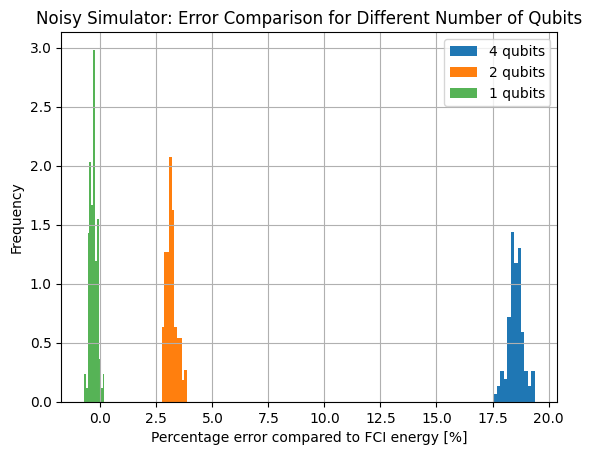

In [9]:
with plt.style.context('default'): #'default' 'seaborn'
    plt.hist(100*(np.array(MINI_4Q)-float(Ref_Energy_4Q))/np.abs(float(Ref_Energy_4Q)),density=True,bins='auto',label='4 qubits')
    plt.hist(100*(np.array(MINI_2Q)-float(Ref_Energy_2Q))/np.abs(float(Ref_Energy_2Q)),density=True,bins='auto',label='2 qubits')
    plt.hist(100*(np.array(MINI_1Q)-float(Ref_Energy_1Q))/np.abs(float(Ref_Energy_1Q)),density=True,bins='auto',alpha=0.8,label='1 qubits')
    plt.title('Noisy Simulator: Error Comparison for Different Number of Qubits')
    plt.xlabel('Percentage error compared to FCI energy [%]')
    plt.ylabel('Frequency')
    plt.grid()
    plt.legend()
    plt.savefig('MINI_UCCSD_POWELL_Comp.png')
    plt.show()
#\n Basis=MINI, Ansatz=UCCSD, Optimiser = POWELL

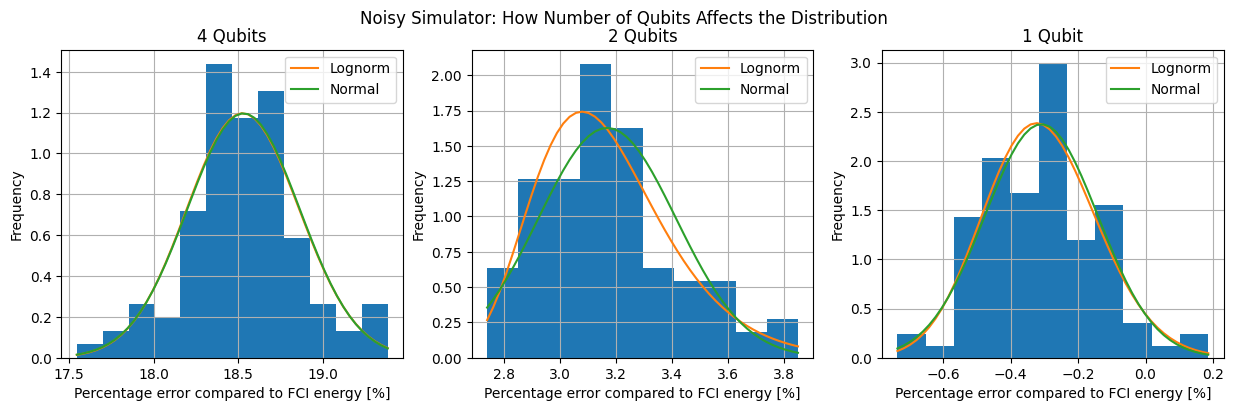

In [10]:
err_4q = 100*(np.array(MINI_4Q)-float(Ref_Energy_4Q))/np.abs(float(Ref_Energy_4Q))
err_2q = 100*(np.array(MINI_2Q)-float(Ref_Energy_2Q))/np.abs(float(Ref_Energy_2Q))
err_1q = 100*(np.array(MINI_1Q)-float(Ref_Energy_1Q))/np.abs(float(Ref_Energy_1Q))

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,4))
#fig.suptitle('Noisy Simulator: How Number of Qubits Affects the Distribution')
[s_fit4,loc_fit4,scale_fit4] = scipy.stats.lognorm.fit(err_4q)
[mean_fit4, std_fit4] = scipy.stats.norm.fit(err_4q)

[s_fit2,loc_fit2,scale_fit2] = scipy.stats.lognorm.fit(err_2q)
[mean_fit2, std_fit2] = scipy.stats.norm.fit(err_2q)

[s_fit1,loc_fit1,scale_fit1] = scipy.stats.lognorm.fit(err_1q)
[mean_fit1, std_fit1] = scipy.stats.norm.fit(err_1q)

x4 = np.linspace(np.min(err_4q),np.max(err_4q))
x2 = np.linspace(np.min(err_2q),np.max(err_2q))
x1 = np.linspace(np.min(err_1q),np.max(err_1q))


with plt.style.context('default'):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,4))
    fig.suptitle('Noisy Simulator: How Number of Qubits Affects the Distribution')
    
    ax1.hist(err_4q,density=True,bins='auto') 
    ax1.plot(x4,scipy.stats.lognorm.pdf(x4,s_fit4,loc=loc_fit4,scale=scale_fit4),label='Lognorm')
    ax1.plot(x4,scipy.stats.norm.pdf(x4,mean_fit4, std_fit4),label='Normal')
    ax1.set_title('4 Qubits')
    ax1.set_xlabel('Percentage error compared to FCI energy [%]')
    ax1.set_ylabel('Frequency')
    ax1.grid()
    ax1.legend()
    
    ax2.hist(err_2q,density=True,bins='auto') 
    ax2.plot(x2,scipy.stats.lognorm.pdf(x2,s_fit2,loc=loc_fit2,scale=scale_fit2),label='Lognorm')
    ax2.plot(x2,scipy.stats.norm.pdf(x2,mean_fit2, std_fit2),label='Normal')
    ax2.set_title('2 Qubits')
    ax2.set_xlabel('Percentage error compared to FCI energy [%]')
    ax2.set_ylabel('Frequency')
    ax2.grid()
    ax2.legend()
    
    ax3.hist(err_1q,density=True,bins='auto') 
    ax3.plot(x1,scipy.stats.lognorm.pdf(x1,s_fit1,loc=loc_fit1,scale=scale_fit1),label='Lognorm')
    ax3.plot(x1,scipy.stats.norm.pdf(x1,mean_fit1, std_fit1),label='Normal')
    ax3.set_title('1 Qubit')
    ax3.set_xlabel('Percentage error compared to FCI energy [%]')
    ax3.set_ylabel('Frequency')
    ax3.grid()
    ax3.legend()
    plt.savefig('MINI_UCCSD_POWELL_Sep.png')
    plt.show()

In [11]:
stat, p = shapiro(err_4q)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.984, p=0.265
Probably Gaussian


In [12]:
stat, p = shapiro(err_2q)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.969, p=0.020
Probably not Gaussian


In [13]:
stat, p = shapiro(err_1q)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.987, p=0.468
Probably Gaussian
